# Projeto Modulação AM
*Camada Física da Computação 2020/2*

William Silva | williamars@insper.edu.br

*****Importando as bibliotecas necessárias*****

In [193]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy.fftpack import fft, fftshift
from suaBibSignal import signalMeu
import sounddevice as sd
import soundfile   as sf

*****Função Low Pass*****

In [217]:
# OPÇÃO 1 -> não estava funcionando tão bem, estava "jogando o som para frente"
def LPF(signal, cutoff_hz, fs):
        from scipy import signal as sg
        #####################
        # Filtro
        #####################
        # https://scipy.github.io/old-wiki/pages/Cookbook/FIRFilter.html
        nyq_rate = fs/2
        width = 5.0/nyq_rate
        ripple_db = 120.0 #dB
        N , beta = sg.kaiserord(ripple_db, width)
        taps = sg.firwin(N, cutoff_hz/nyq_rate, window=('kaiser', beta))
        return( sg.lfilter(taps, 1.0, signal))

In [194]:
# Usei esse. Ele não filtra igual o de cima, mas ainda faz 
# Referência: https://gist.github.com/junzis/e06eca03747fc194e322
from scipy.signal import butter, lfilter, freqz
def butter_lowpass(cutoff, fs, order=5): 
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

*****Propriedades dos sinais*****

In [195]:
fs  = 44100
A   = 1
sd.default.samplerate = fs
sd.default.channels = 1

Inicializando a biblioteca para utilizar as funções

In [196]:
mySignal = signalMeu()

### 1. Leitura do arquivo .wav

In [197]:
audio, samplerate = sf.read('camFis.wav')
yAudio = audio[:,0]
sd.play(audio)
sd.wait()

In [198]:
# Pegando o tempo do áudio
T = len(yAudio)/samplerate

### 2. Normalizando o sinal

In [169]:
choose = max(np.abs(yAudio))
yNormalizado = yAudio/choose

### 3. Reprodução do áudio normalizado

In [170]:
sd.play(yNormalizado)
sd.wait()

### 4. Filtrando as altas frequências, acima de 4000 Hz

In [216]:
yFiltrado = butter_lowpass_filter(yNormalizado, 4000, fs)

### 5. Tocando o novo áudio

In [200]:
sd.play(yFiltrado)
sd.wait()

### 6. Modulando o sinal

In [201]:
# Primeiro fazendo a portadora
frequency = 14000
x, port = mySignal.generateSin(frequency, A, T, fs)

# Fazendo a modulação de fato
yModulado = yFiltrado * port

### 7. Executando o sinal modulado

In [202]:
sd.play(yModulado)
sd.wait()

### 8. Gráficos

- ***Sinal de Áudio Original***

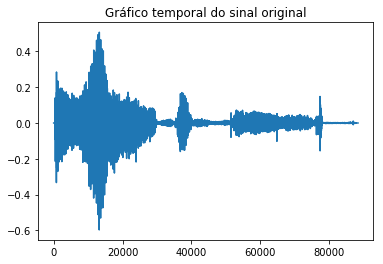

In [203]:
plt.title("Gráfico temporal do sinal original")
plt.plot(yAudio)

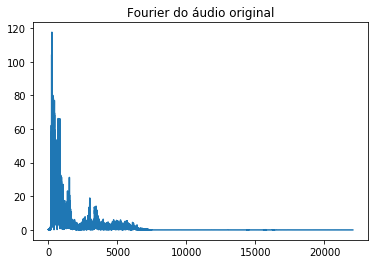

In [204]:
X, Y = mySignal.calcFFT(yAudio, fs)
plt.title("Fourier do áudio original")
plt.plot(X, np.abs(Y))

- ***Sinal de Áudio Normalizado***

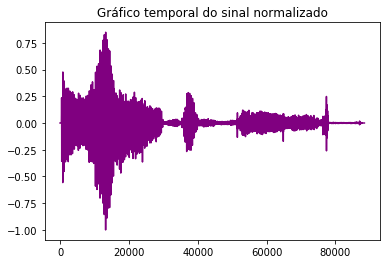

In [205]:
plt.title("Gráfico temporal do sinal normalizado")
plt.plot(yNormalizado, 'purple')

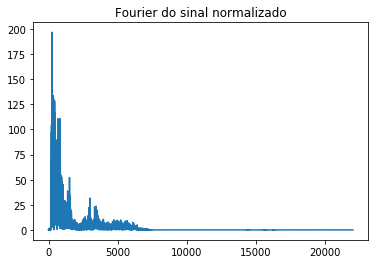

In [222]:
Xnorm, Ynorm = mySignal.calcFFT(yNormalizado, fs)
plt.title("Fourier do sinal normalizado")
plt.plot(Xnorm, np.abs(Ynorm))

- ***Sinal de Áudio Filtrado***

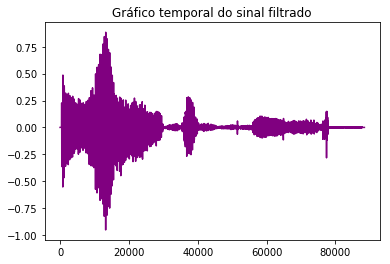

In [207]:
plt.title("Gráfico temporal do sinal filtrado")
plt.plot(yFiltrado, 'purple')

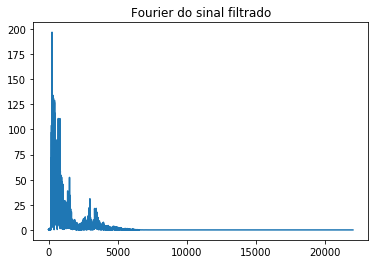

In [221]:
plt.title("Fourier do sinal filtrado")
Xfil, Yfil = mySignal.calcFFT(yFiltrado, fs)
plt.plot(Xfil, np.abs(Yfil))

- ***Sinal de Áudio Modulado***

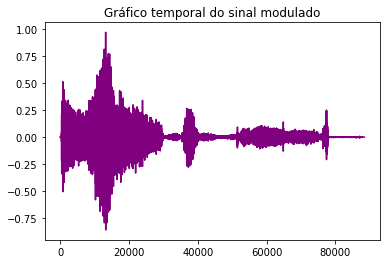

In [181]:
plt.title("Gráfico temporal do sinal modulado")
plt.plot(yModulado, 'purple')

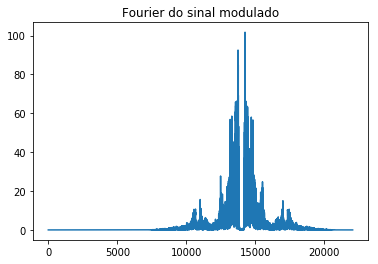

In [182]:
Xmod, Ymod = mySignal.calcFFT(yModulado, fs)
plt.title("Fourier do sinal modulado")
plt.plot(Xmod, np.abs(Ymod))

### 9. Demodulação do sinal

In [183]:
yDemodulado = yModulado * port

### 10. Executando o sinal demodulado

In [184]:
sd.play(yDemodulado)
sd.wait()

### 11. Gráficos do sinal demodulado

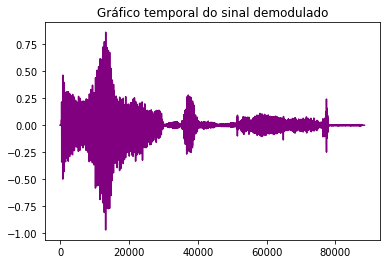

In [185]:
plt.title("Gráfico temporal do sinal demodulado")
plt.plot(yDemodulado, 'purple')

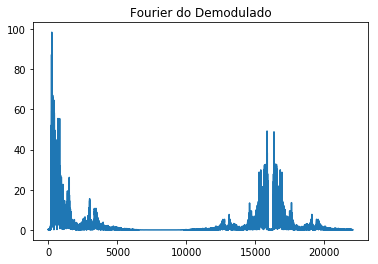

In [186]:
Xdemod, Ydemod = mySignal.calcFFT(yDemodulado, fs)
plt.title("Fourier do Demodulado")
plt.plot(Xdemod, np.abs(Ydemod))

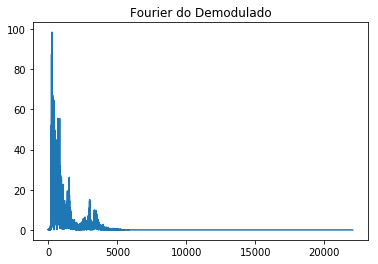

In [190]:
teste = butter_lowpass_filter(yDemodulado, 4000, fs)

Xdemod, Ydemod = mySignal.calcFFT(teste, fs)
plt.title("Fourier do Demodulado")
plt.plot(Xdemod, np.abs(Ydemod))
sd.play(teste)